In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format

In [3]:
data = pd.read_csv('cardiovascular_risk.csv')

In [4]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.00000,F,YES,3.00000,0.00000,0,0,0,221.00000,148.00000,85.00000,NaN,90.00000,80.00000,1
1,1,36,4.00000,M,NO,0.00000,0.00000,0,1,0,212.00000,168.00000,98.00000,29.77000,72.00000,75.00000,0
2,2,46,1.00000,F,YES,10.00000,0.00000,0,0,0,250.00000,116.00000,71.00000,20.35000,88.00000,94.00000,0
3,3,50,1.00000,M,YES,20.00000,0.00000,0,1,0,233.00000,158.00000,88.00000,28.26000,68.00000,94.00000,1
4,4,64,1.00000,F,YES,30.00000,0.00000,0,0,0,241.00000,136.50000,85.00000,26.42000,70.00000,77.00000,0


In [5]:
data.shape

(3390, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Handling Null Values

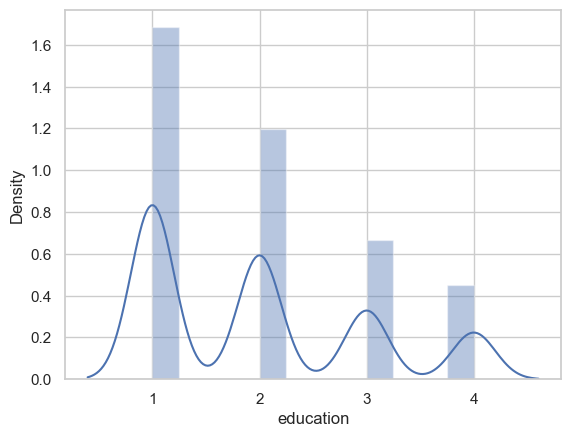

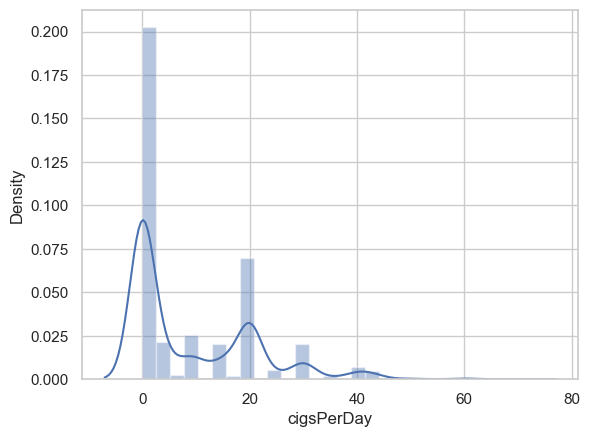

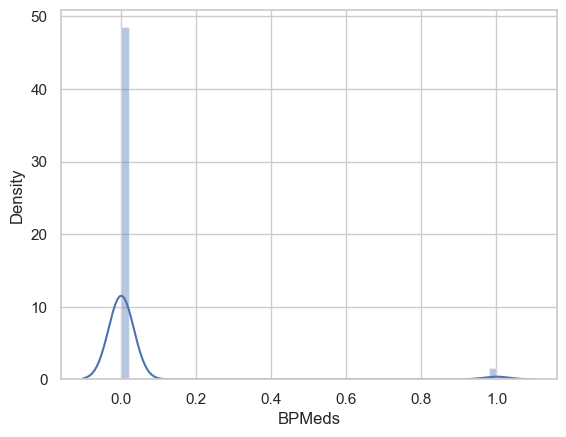

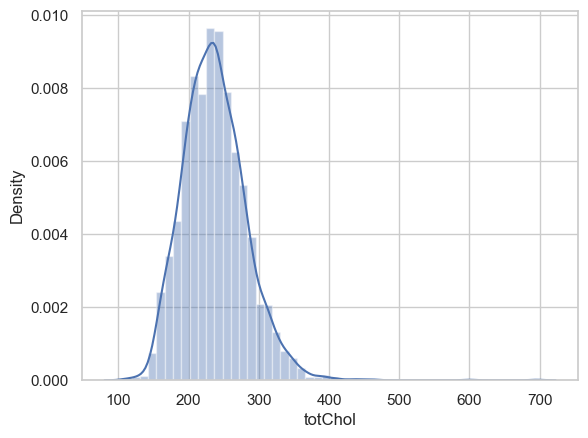

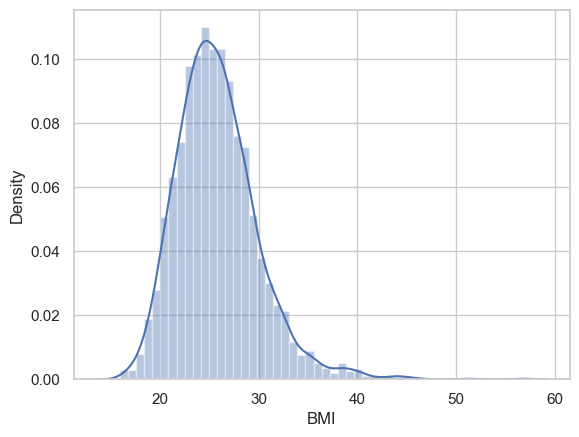

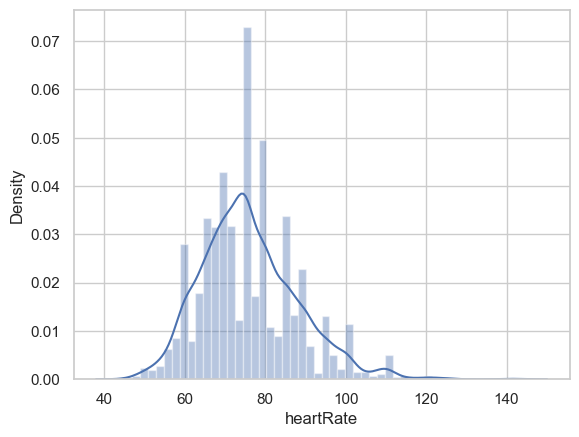

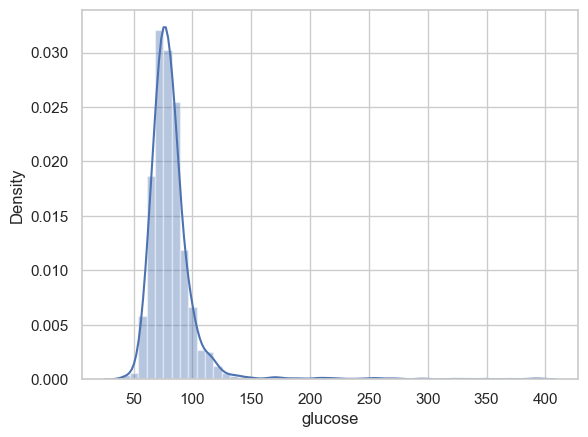

In [9]:
null_feat = [f for f in data.columns if data[f].isnull().sum() != 0]
for i in null_feat:
  sns.distplot(data[i])
  plt.show()

In [10]:
for s in null_feat:
  print(f'The skewness of feature {s} is {data[s].skew()}')

The skewness of feature education is 0.6989458587600983
The skewness of feature cigsPerDay is 1.2230053709053774
The skewness of feature BPMeds is 5.524325007968017
The skewness of feature totChol is 0.9406357047700903
The skewness of feature BMI is 1.0222520011438563
The skewness of feature heartRate is 0.6764897223370003
The skewness of feature glucose is 6.1443896544049394


In [11]:
# Handling Null Values
# For Numerical Features
data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace = True)
data['totChol'].fillna(data['totChol'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)
data['heartRate'].fillna(data['heartRate'].median(), inplace = True)
data['glucose'].fillna(data['glucose'].median(), inplace = True)

# For Categorical Features
data['education'].fillna(float(data['education'].mode()), inplace = True)
data['BPMeds'].fillna(float(data['BPMeds'].mode()), inplace = True)

In [12]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
data.drop('id', axis = 1, inplace = True)

In [14]:
num_feat = [i for i in data.columns if data[i].dtype != 'O']
num_feat

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [15]:
cat_feat = [i for i in data.columns if data[i].dtype == 'O']
cat_feat

['sex', 'is_smoking']

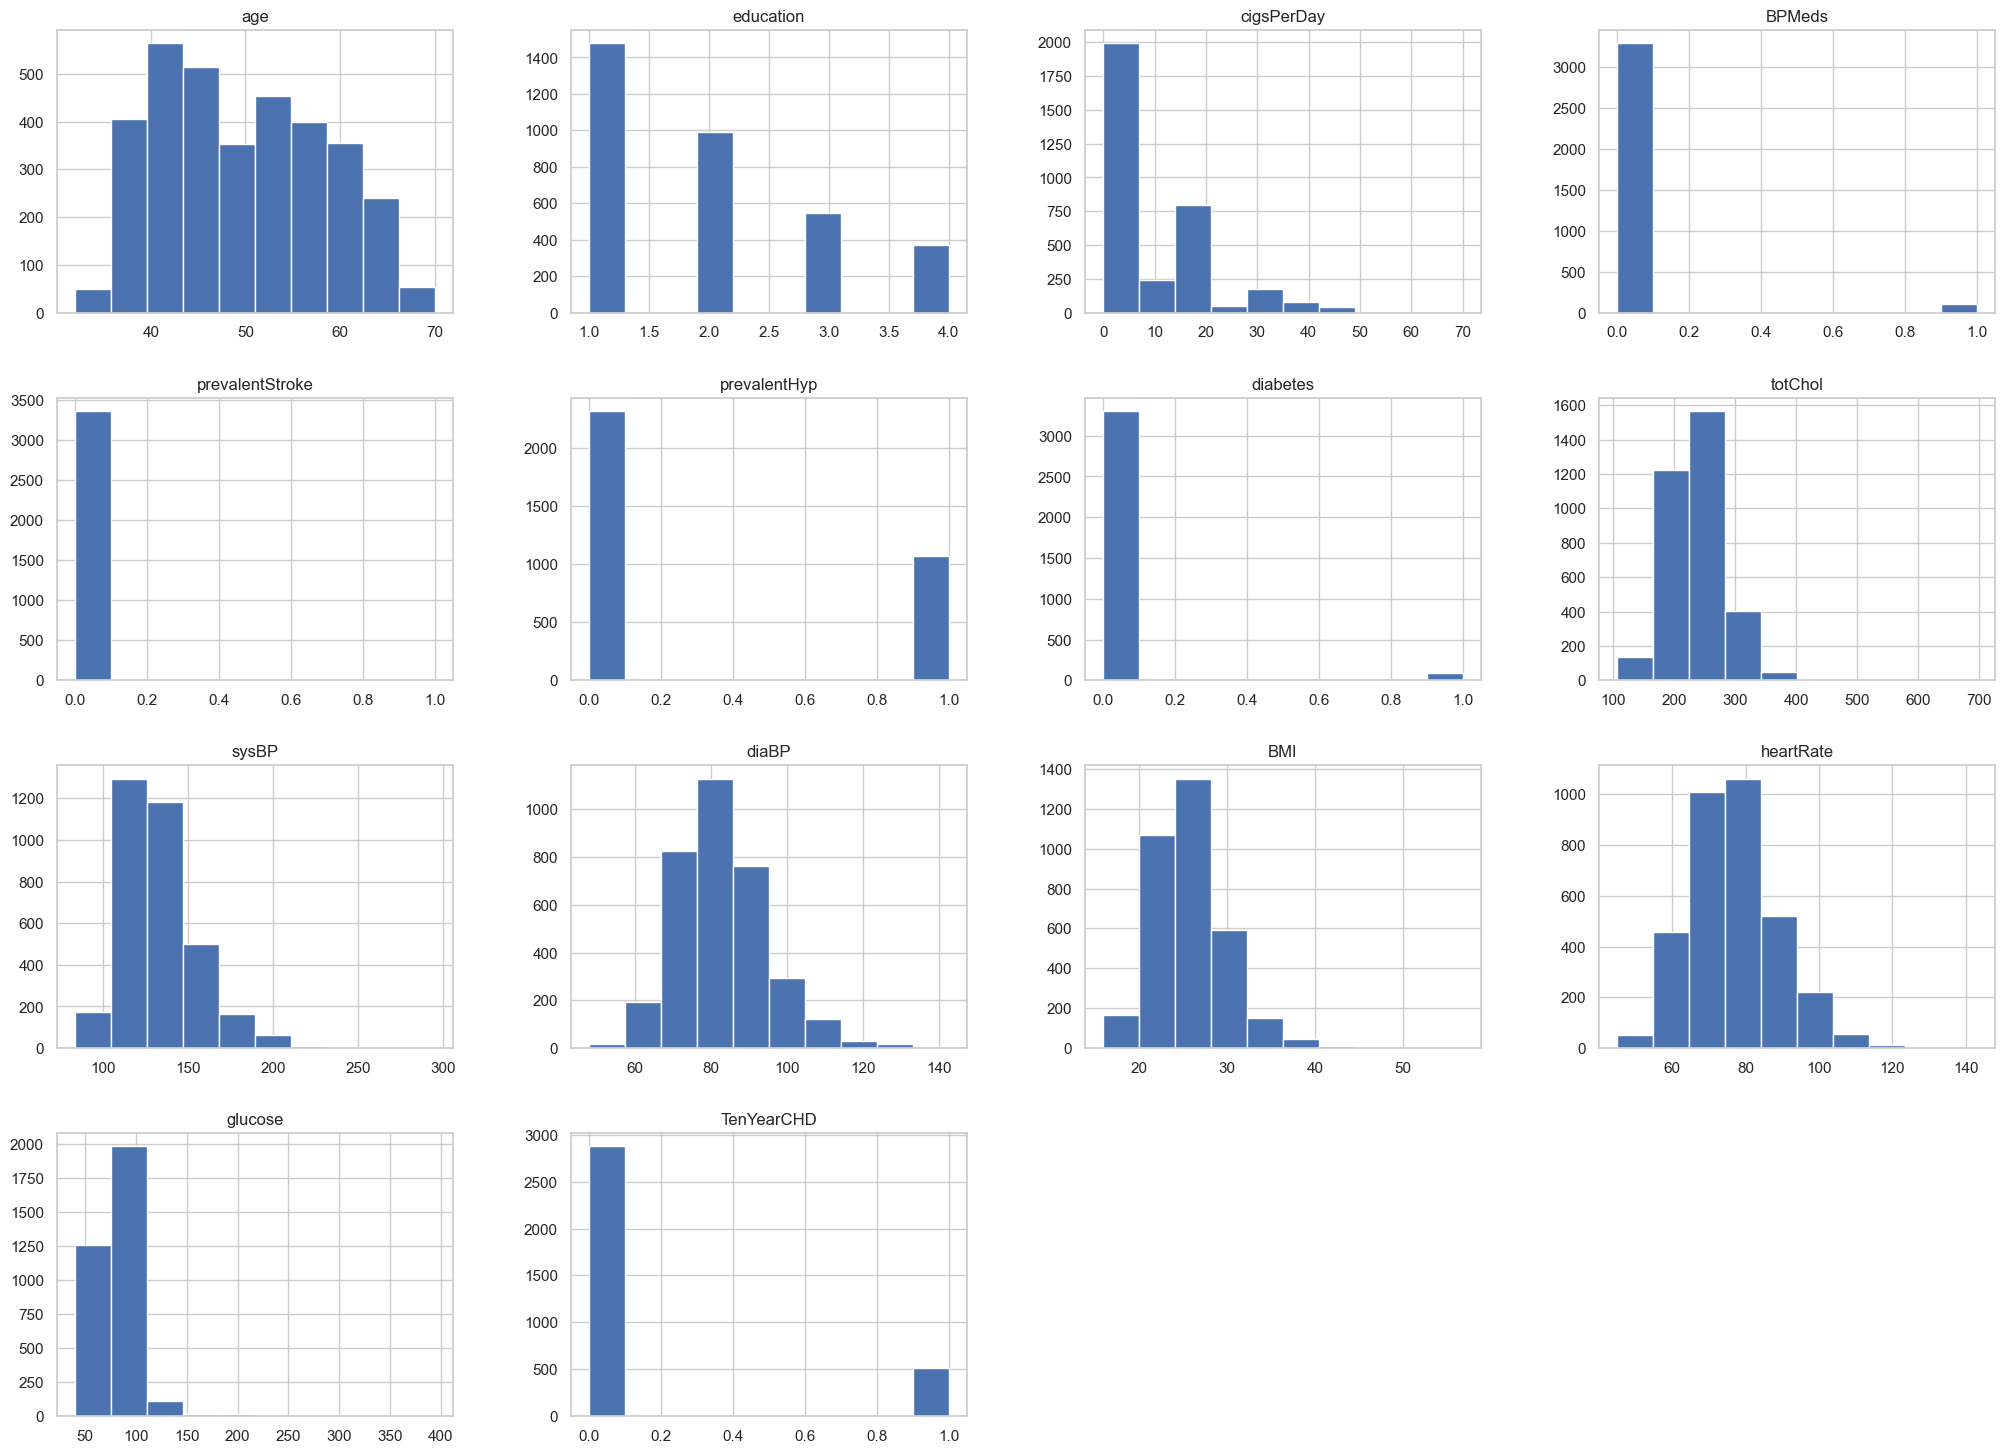

In [16]:
data.hist(figsize=(25,18))
plt.show()

In [17]:
cont_feat = [i for i in num_feat if len(data[i].unique()) > 10]
cont_feat

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [18]:
discrete_feat = [i for i in num_feat if len(data[i].unique()) < 10]
discrete_feat

['education',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [19]:
data[cont_feat].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000,3390.00000
mean,49.54218,9.01062,237.03982,132.60118,82.88304,25.79325,75.97699,81.72006
std,8.59288,11.86284,44.99421,22.29203,12.02358,4.10703,11.97011,23.16126
min,32.00000,0.00000,107.00000,83.50000,48.00000,15.96000,45.00000,40.00000
25%,42.00000,0.00000,206.00000,117.00000,74.50000,23.03000,68.00000,72.00000
50%,49.00000,0.00000,234.00000,128.50000,82.00000,25.38000,75.00000,78.00000
75%,56.00000,20.00000,264.00000,144.00000,90.00000,27.99750,83.00000,85.00000
max,70.00000,70.00000,696.00000,295.00000,142.50000,56.80000,143.00000,394.00000


In [20]:
data[discrete_feat].astype(str).describe(include = 'object')

,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3390,3390,3390,3390,3390,3390
unique,4,2,2,2,2,2
top,1.0,0.0,0,0,0,0
freq,1478,3290,3368,2321,3303,2879


In [21]:
data[discrete_feat].astype(str).describe(include = 'object')

,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,3390,3390,3390,3390,3390,3390
unique,4,2,2,2,2,2
top,1.0,0.0,0,0,0,0
freq,1478,3290,3368,2321,3303,2879


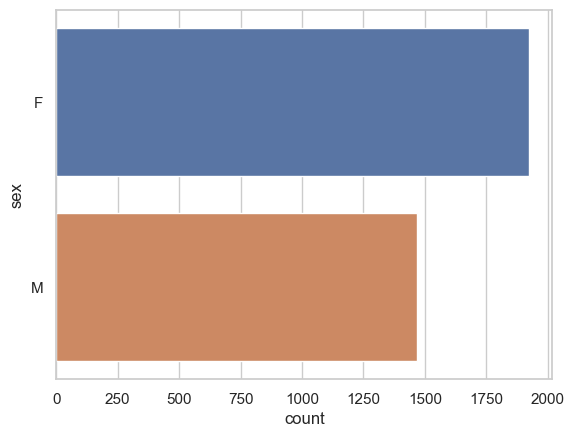

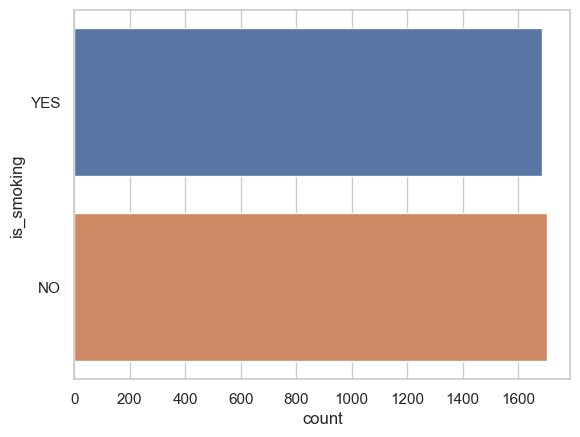

In [22]:
for c in cat_feat:
  sns.countplot(y = c, data = data)
  plt.show()

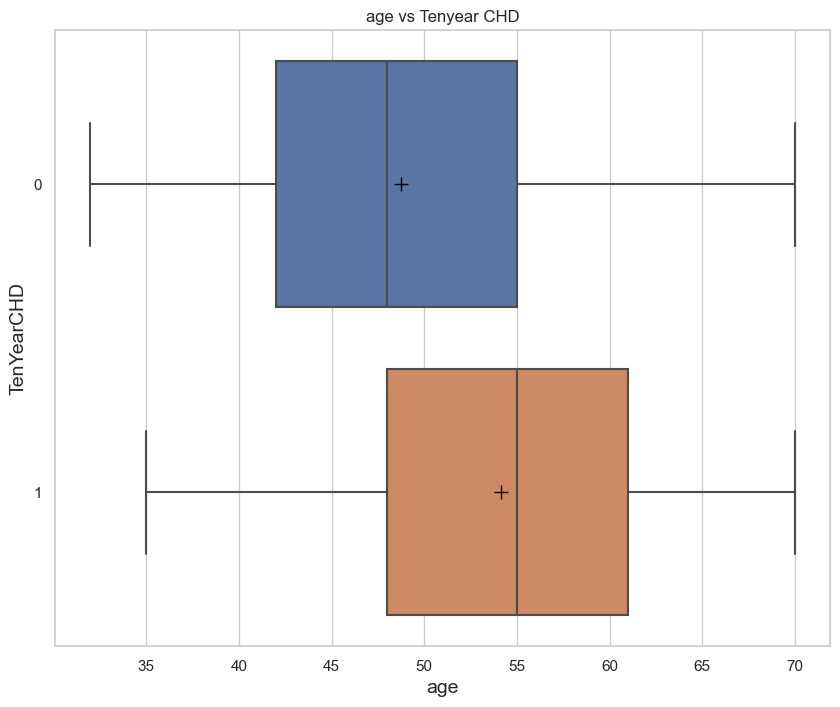

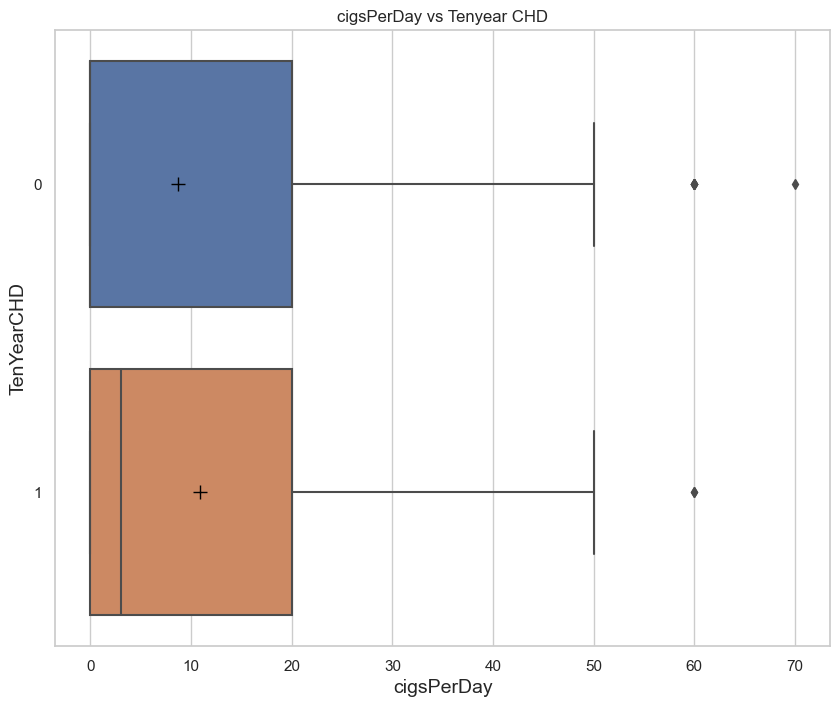

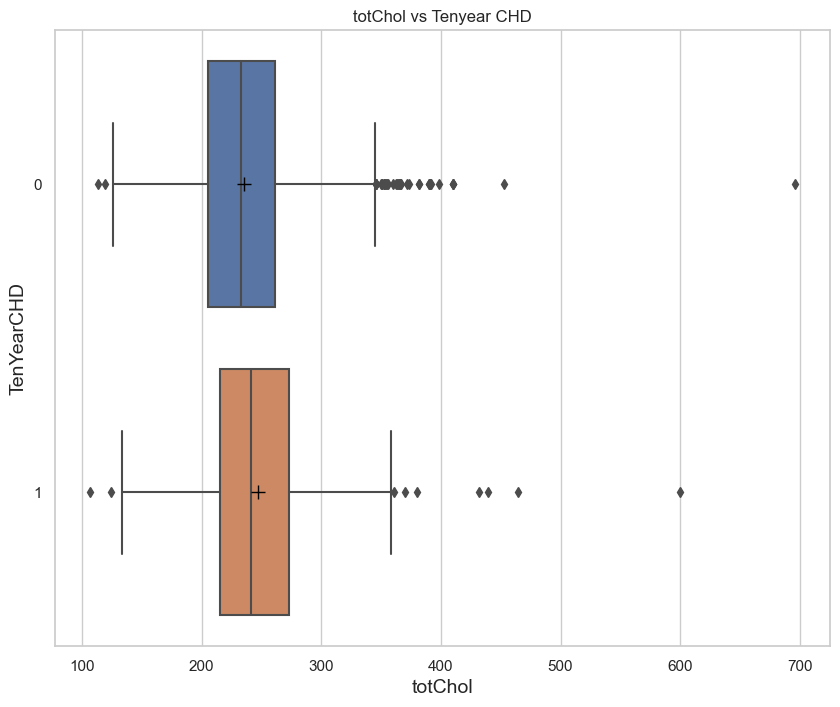

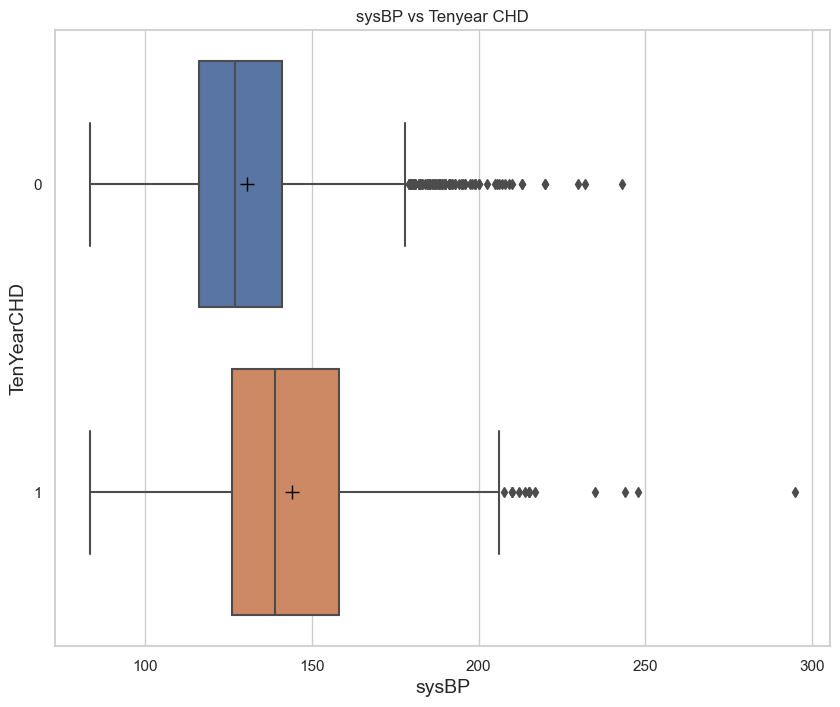

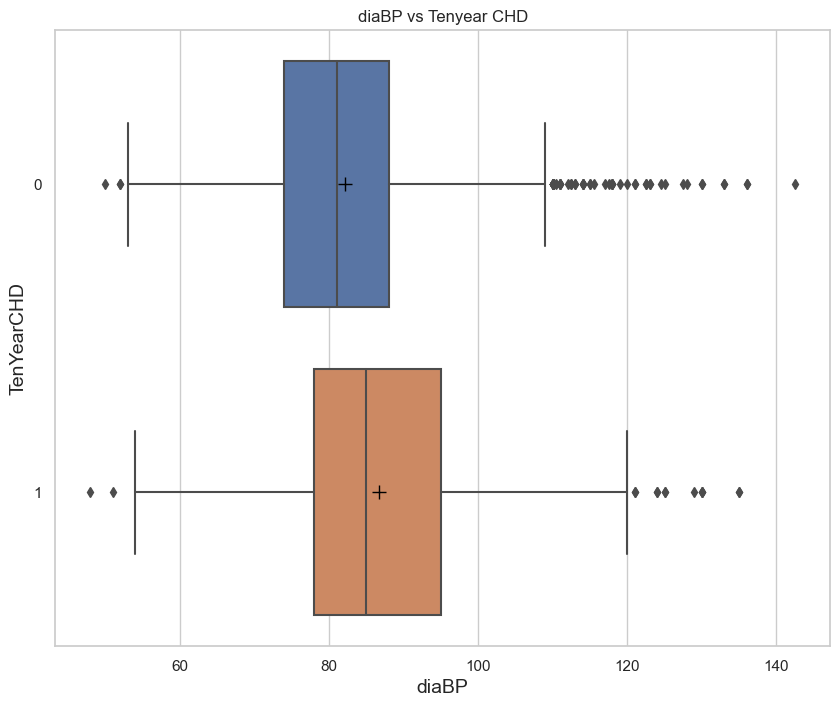

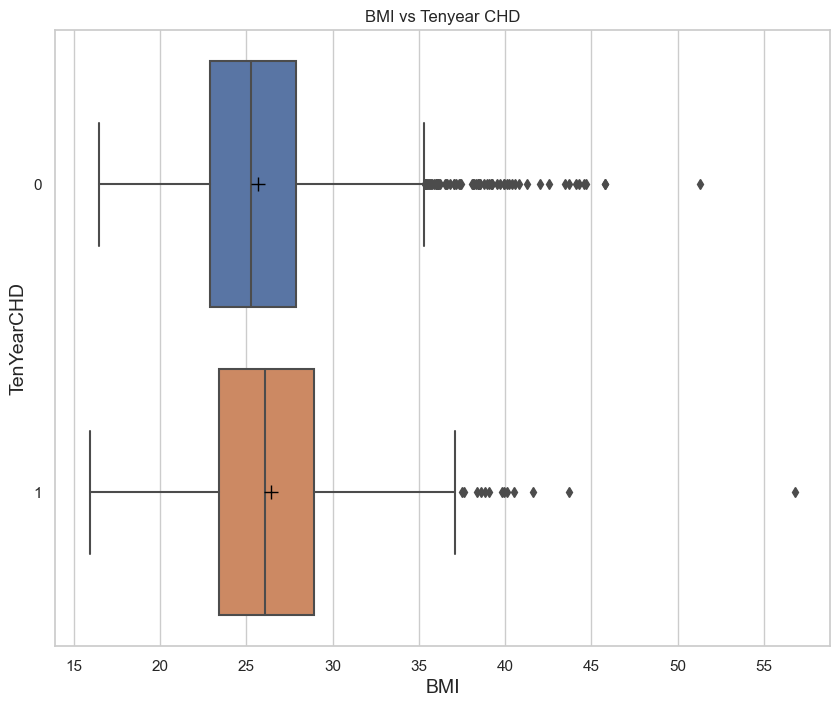

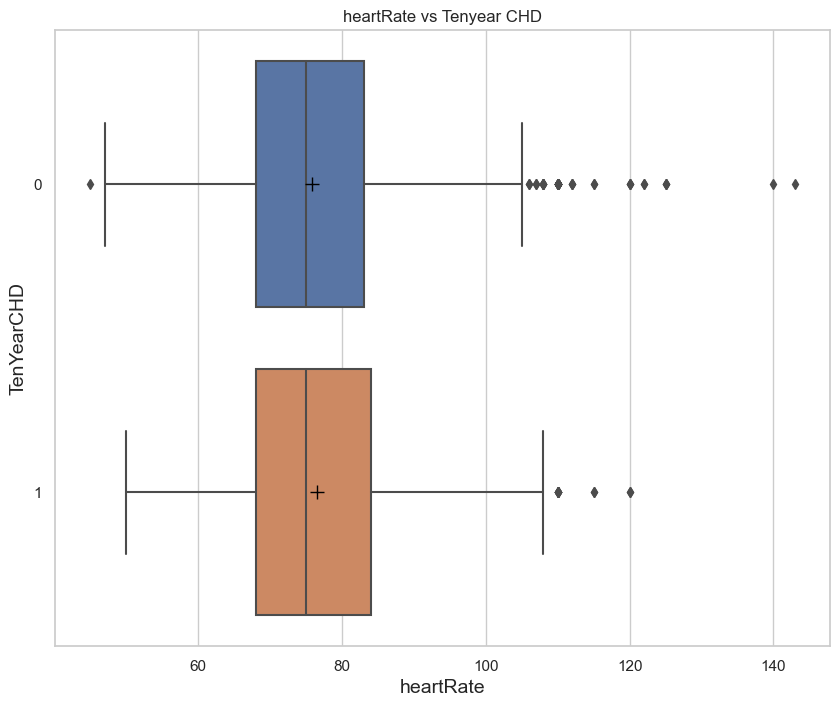

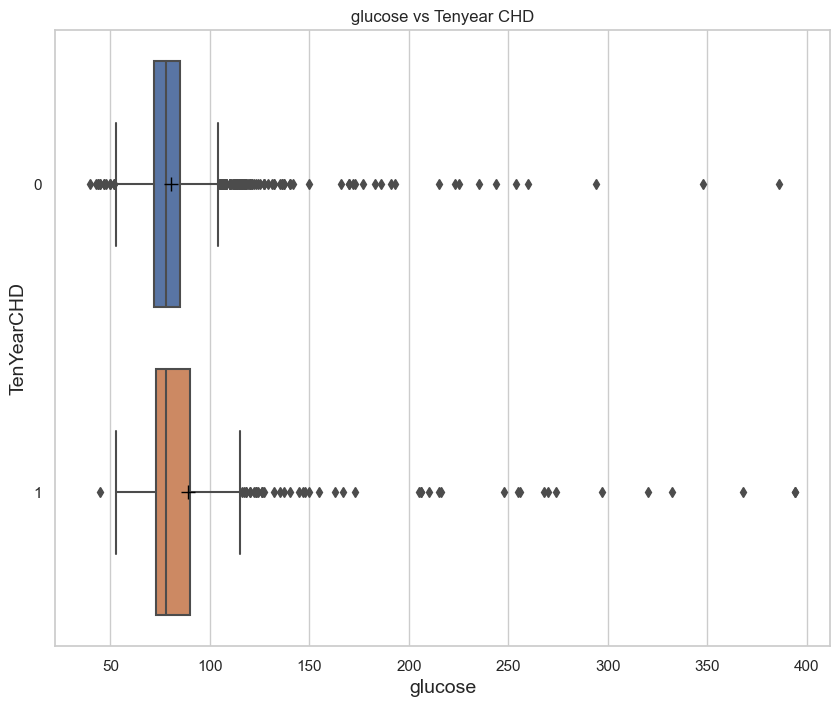

In [23]:
for n in cont_feat:
  plt.figure(figsize=(10, 8))
  sns.boxplot(x=n,
            y = data['TenYearCHD'].astype('category'),
            data=data,
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
  plt.ylabel("TenYearCHD", size=14)
  plt.xlabel(n, size=14)
  plt.title(f'{n} vs Tenyear CHD', size=12)
  plt.show()

In [24]:
for c in cat_feat:
  display(pd.crosstab(data['TenYearCHD'], data[c], normalize='index'))
  print('\t')

sex,F,M
TenYearCHD,,
0,0.58493,0.41507
1,0.46771,0.53229


is_smoking,NO,YES
TenYearCHD,,
0,0.50955,0.49045
1,0.46184,0.53816


In [25]:
for d in discrete_feat:
  display(pd.crosstab(data['TenYearCHD'], data[d], normalize='index'))
  print('\t')

education,1.00000,2.00000,3.00000,4.00000
TenYearCHD,,,,
0,0.41994,0.30288,0.16638,0.11080
1,0.52642,0.23092,0.13699,0.10568


BPMeds,0.00000,1.00000
TenYearCHD,,
0,0.97673,0.02327
1,0.93542,0.06458


prevalentStroke,0,1
TenYearCHD,,
0,0.99583,0.00417
1,0.98043,0.01957


prevalentHyp,0,1
TenYearCHD,,
0,0.71726,0.28274
1,0.50098,0.49902


diabetes,0,1
TenYearCHD,,
0,0.98124,0.01876
1,0.93542,0.06458


TenYearCHD,0,1
TenYearCHD,,
0,1.00000,0.00000
1,0.00000,1.00000


In [26]:
def comparison(feature):
  grouped_data = data.groupby([feature, 'TenYearCHD'])['age'].count().reset_index().rename(columns = {'age':'count'})


  yes = grouped_data[grouped_data['TenYearCHD'] == 1]
  no = grouped_data[grouped_data['TenYearCHD'] == 0]

  plt.figure(figsize = (8,6))
  width = 0.2  #assigning width

  # LOCATIONS TO PLOT
  yes_bar = np.arange(len(grouped_data[feature].unique()))
  no_bar = [i+width for i in yes_bar]



  plt.bar(yes_bar, yes['count'], width = width, label = 'YES' )
  plt.bar(no_bar, no['count'], width = width, label = 'NO' )


  plt.xticks(yes_bar+width + width/2 , yes[feature])
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(f'Count of yes or no for heart risk for each category of {feature}')
  plt.legend()
  plt.show()

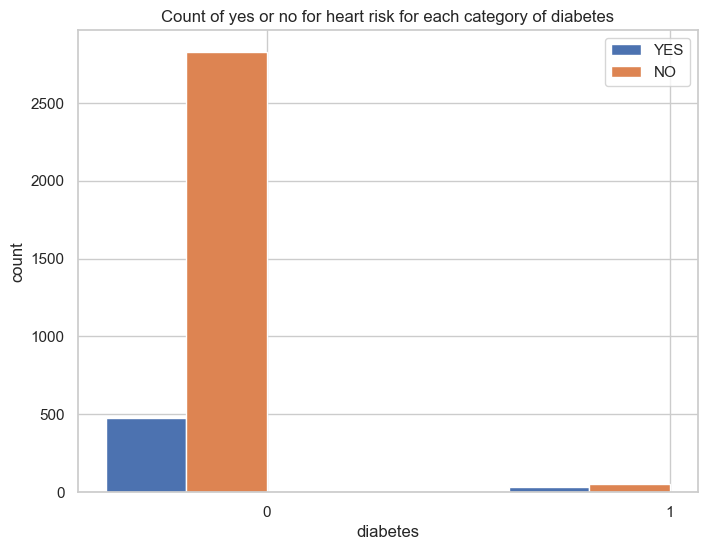

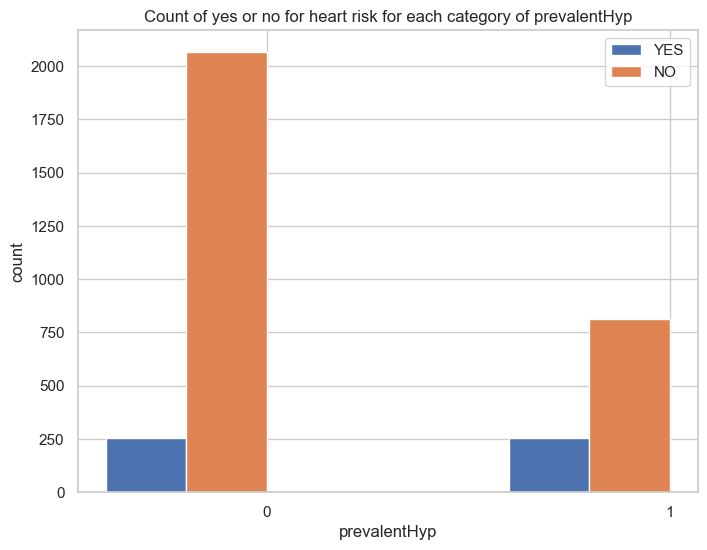

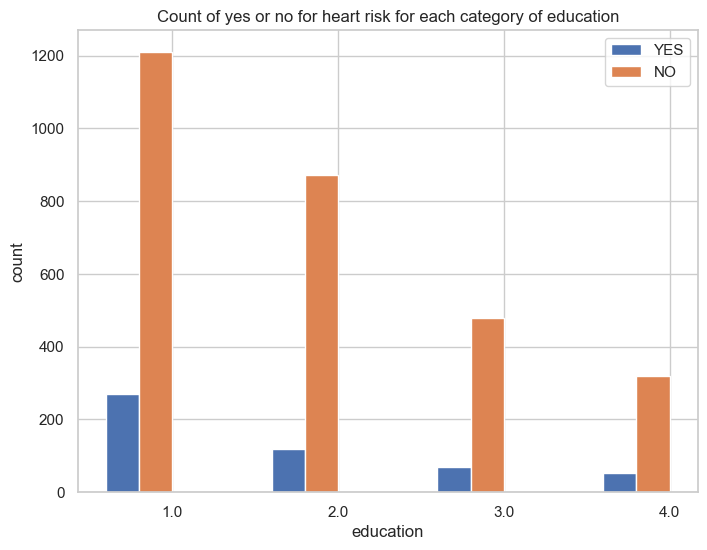

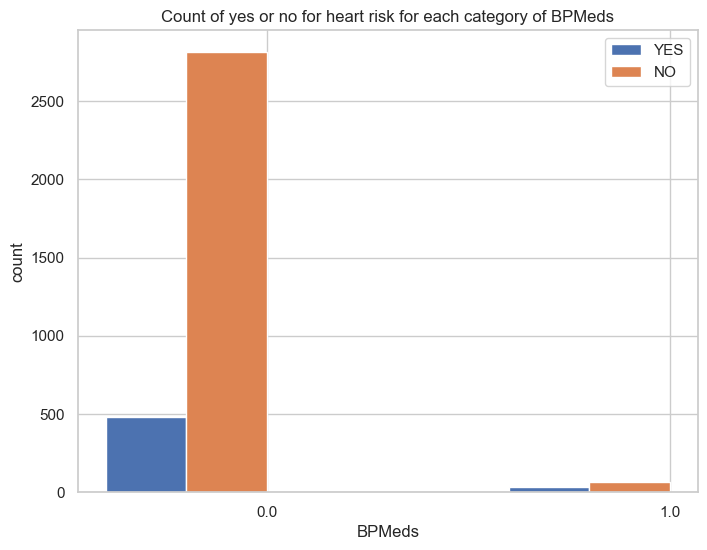

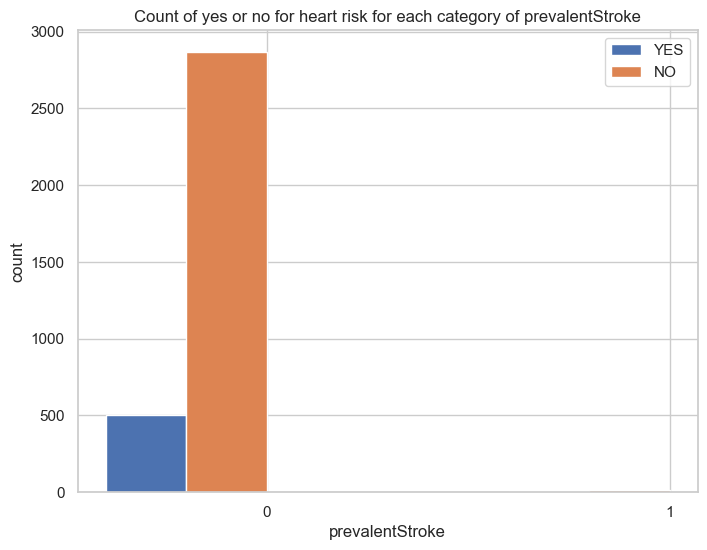

In [27]:
target = 'TenYearCHD'
feat = list(set(discrete_feat) - {target})  # Removing target feature
for f in feat:
  comparison(f)
  print('\t')

In [28]:
# Group numeric features by discrete and categorical features
# let us check how the categories are related to the numerical features
# For discrete features
for d in discrete_feat:
  display(data.groupby(d)[cont_feat].mean())
  print('\t')
  print('\t')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
education,,,,,,,,
1.00000,51.86942,8.58051,238.27605,135.99391,83.85927,26.56026,76.00609,82.86468
2.00000,47.15455,9.98283,236.07172,131.10455,82.34798,25.27152,76.76970,80.93737
3.00000,48.56648,7.92896,236.54463,129.10929,81.51821,24.98310,75.84517,81.01639
4.00000,48.09383,9.72654,235.43968,128.26944,82.44370,25.33118,73.95174,80.29759


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
BPMeds,,,,,,,,
0.00000,49.35927,9.08450,236.40517,131.58936,82.46641,25.73050,75.93921,81.47234
1.00000,55.56000,6.58000,257.92000,165.89000,96.59000,27.85770,77.22000,89.87000


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
prevalentStroke,,,,,,,,
0,49.50119,9.05048,237.07898,132.49748,82.83714,25.78760,75.99555,81.67577
1,55.81818,2.90909,231.04545,148.47727,89.90909,26.65864,73.13636,88.50000


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
prevalentHyp,,,,,,,,
0,47.74149,9.63852,232.19474,122.02348,77.88259,24.95827,74.75269,80.41620
1,53.45182,7.64733,247.55940,155.56735,93.73994,27.60616,78.63517,84.55098


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
diabetes,,,,,,,,
0,49.39177,9.10324,236.60763,132.15259,82.76370,25.73474,75.89979,79.42840
1,55.25287,5.49425,253.44828,149.63218,87.41379,28.01460,78.90805,168.72414


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.72803,8.67072,235.26572,130.60386,82.19434,25.67884,75.87530,80.41785
1,54.12916,10.92564,247.03523,143.85421,86.76321,26.43787,76.54990,89.05675


In [29]:
# For categorical features

for c in cat_feat:
  display(data.groupby(c)[cont_feat].mean())
  print('\t')
  print('\t')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
sex,,,,,,,,
F,49.85647,5.59906,239.79199,133.32865,82.26521,25.48088,77.21789,81.78107
M,49.13020,13.48262,233.43217,131.64758,83.69291,26.20272,74.35037,81.64008


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
is_smoking,,,,,,,,
NO,51.34645,0.00000,239.14445,135.83382,84.37052,26.49912,75.23664,83.08808
YES,47.72081,18.10670,234.91523,129.33788,81.38145,25.08069,76.72436,80.33906


In [30]:
# lets convert categorical features into numerical features

# Function to convert sex column
def sex(x):
  if x == 'F':
    return 1
  else:
    return 0

# Function to convert is_smoking column
def is_smoking(x):
  if x == 'YES':
    return 1
  else:
    return 0

# applying above functions to categorical features
data['sex'] = data['sex'].apply(sex)
data['is_smoking'] = data['is_smoking'].apply(is_smoking)

In [31]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.00000,1,1,3.00000,0.00000,0,0,0,221.00000,148.00000,85.00000,25.38000,90.00000,80.00000,1
1,36,4.00000,0,0,0.00000,0.00000,0,1,0,212.00000,168.00000,98.00000,29.77000,72.00000,75.00000,0
2,46,1.00000,1,1,10.00000,0.00000,0,0,0,250.00000,116.00000,71.00000,20.35000,88.00000,94.00000,0
3,50,1.00000,0,1,20.00000,0.00000,0,1,0,233.00000,158.00000,88.00000,28.26000,68.00000,94.00000,1
4,64,1.00000,1,1,30.00000,0.00000,0,0,0,241.00000,136.50000,85.00000,26.42000,70.00000,77.00000,0


In [32]:
data.corr()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.00000,-0.17061,0.04188,-0.21100,-0.19146,0.12211,0.05904,0.30883,0.10787,0.27196,0.40484,0.22190,0.13748,-0.00264,0.11239,0.22493
education,-0.17061,1.00000,-0.02528,0.03019,0.01408,-0.01988,-0.03182,-0.08192,-0.05190,-0.02122,-0.13220,-0.06077,-0.13578,-0.03940,-0.03930,-0.05139
sex,0.04188,-0.02528,1.00000,-0.21549,-0.32931,0.04319,0.01127,-0.00307,-0.00885,0.07004,0.03737,-0.05884,-0.08709,0.11871,0.00302,-0.08465
is_smoking,-0.21100,0.03019,-0.21549,1.00000,0.76327,-0.03753,-0.04370,-0.11932,-0.05333,-0.04700,-0.14572,-0.12432,-0.17271,0.06215,-0.05935,0.03414
cigsPerDay,-0.19146,0.01408,-0.32931,0.76327,1.00000,-0.03573,-0.04158,-0.07800,-0.04811,-0.02535,-0.10035,-0.06832,-0.09983,0.06623,-0.06637,0.06802
BPMeds,0.12211,-0.01988,0.04319,-0.03753,-0.03573,1.00000,0.11618,0.25689,0.07093,0.08092,0.26038,0.19878,0.08765,0.01811,0.06136,0.08735
prevalentStroke,0.05904,-0.03182,0.01127,-0.04370,-0.04158,0.11618,1.00000,0.07165,0.01012,-0.01077,0.05757,0.04724,0.01703,-0.01918,0.02366,0.06863
prevalentHyp,0.30883,-0.08192,-0.00307,-0.11932,-0.07800,0.25689,0.07165,1.00000,0.08257,0.15869,0.69929,0.61290,0.29961,0.15073,0.08296,0.16654
diabetes,0.10787,-0.05190,-0.00885,-0.05333,-0.04811,0.07093,0.01012,0.08257,1.00000,0.05919,0.12401,0.06117,0.08779,0.03975,0.60974,0.10368
totChol,0.27196,-0.02122,0.07004,-0.04700,-0.02535,0.08092,-0.01077,0.15869,0.05919,1.00000,0.19785,0.15382,0.11345,0.08696,0.06091,0.09360


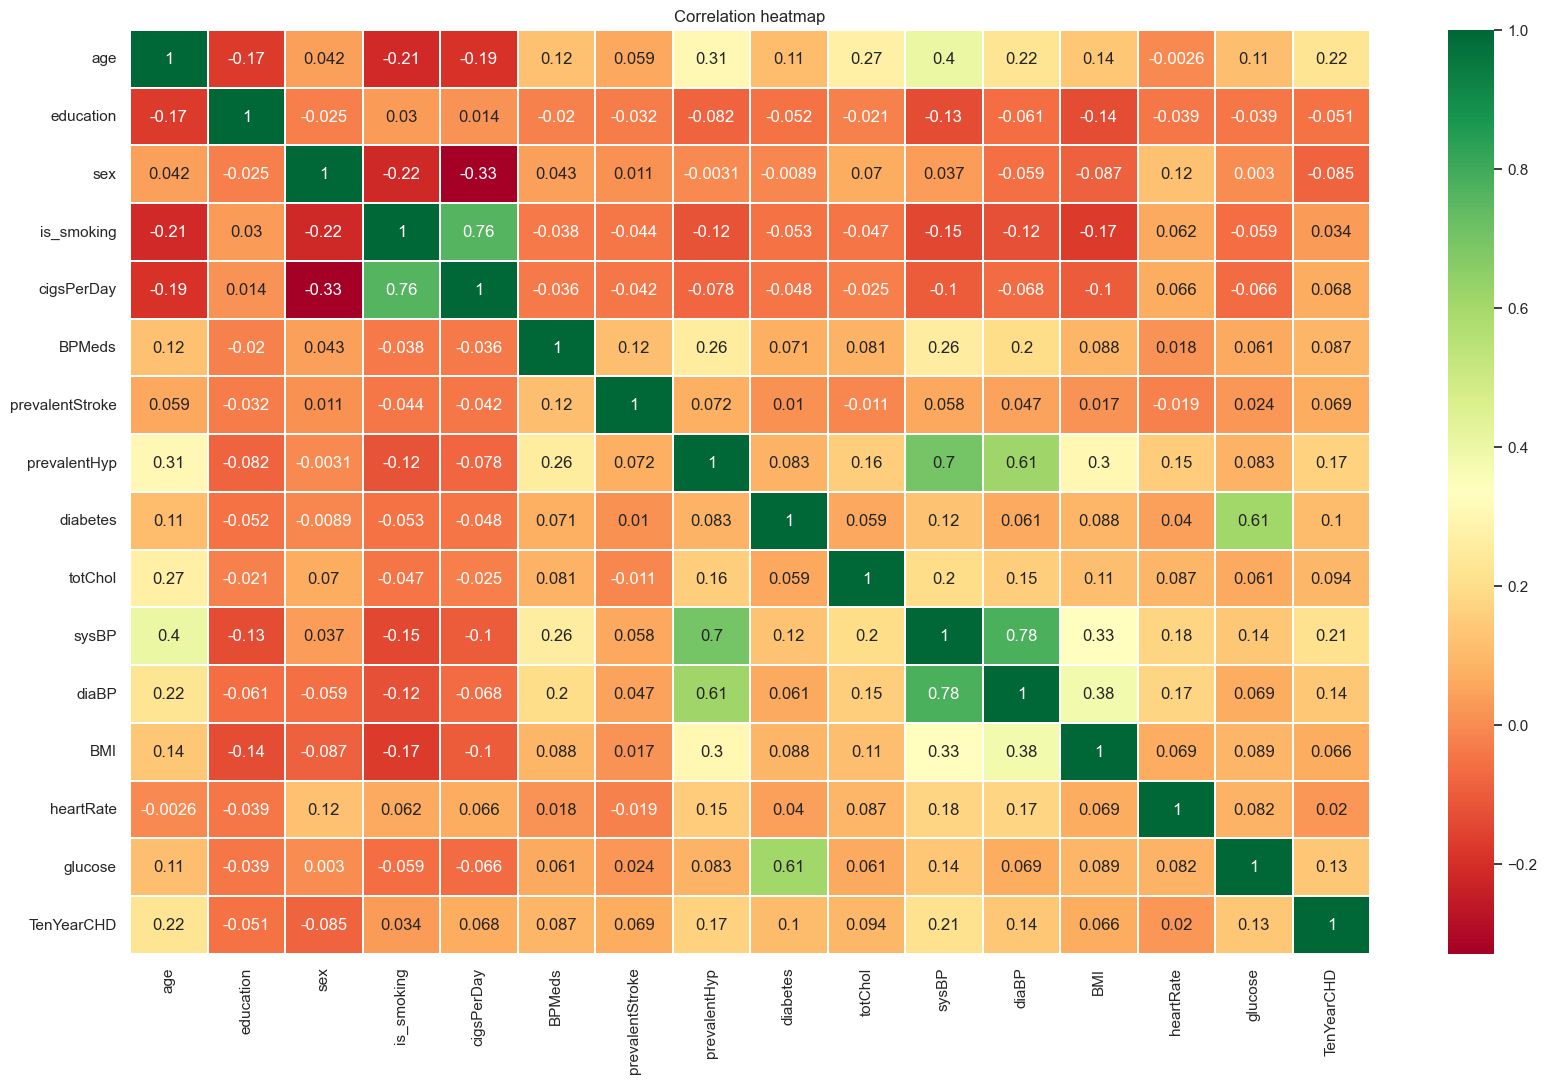

In [33]:
# Visualize the correlation heatmap of numerical features
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
  

In [35]:
# Calculating variance inflation factor
X = data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,41.00621
1,education,4.57505
2,sex,2.75118
3,is_smoking,4.84399
4,cigsPerDay,4.10468
5,BPMeds,1.13290
6,prevalentStroke,1.02704
7,prevalentHyp,2.42968
8,diabetes,1.58544
9,totChol,30.94741


In [36]:
 # Removing Outliers
# Creating a for loop for storing the indeces of outliers
for i in cont_feat:
  indeces = []                                              # creating a empty list
  x = data[i]
  mean = data[i].mean()
  std = data[i].std()
  index = data[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)                                     # appending outlier indeces into indeces list

In [37]:
outliers_index = list(indeces)[0]
outliers_index

Int64Index([  77,  107,  134,  151,  173,  230,  312,  400,  481,  534,  594,
             786, 1032, 1150, 1156, 1281, 1559, 1587, 1610, 1819, 1947, 1977,
            1993, 2164, 2187, 2188, 2262, 2566, 2672, 2703, 2755, 2785, 3042,
            3045, 3063, 3069, 3092, 3117, 3164, 3232, 3260, 3373],
           dtype='int64')

In [38]:
#Removing multicollinearity
# Creating a copy of data in which we will remove outliers
df = data.copy()

# Removing outliers
df.drop(outliers_index, inplace = True)

In [39]:
# Creating new feature pulse_pressure
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

In [40]:
# Dropping sysBP, diaBP, prevalentHyp, is_smoking to remove multi-collinearity
df.drop(['sysBP', 'diaBP', 'prevalentHyp', 'is_smoking'], axis = 1, inplace = True)

In [41]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,64,2.00000,1,3.00000,0.00000,0,0,221.00000,25.38000,90.00000,80.00000,1,63.00000
1,36,4.00000,0,0.00000,0.00000,0,0,212.00000,29.77000,72.00000,75.00000,0,70.00000
2,46,1.00000,1,10.00000,0.00000,0,0,250.00000,20.35000,88.00000,94.00000,0,45.00000
3,50,1.00000,0,20.00000,0.00000,0,0,233.00000,28.26000,68.00000,94.00000,1,70.00000
4,64,1.00000,1,30.00000,0.00000,0,0,241.00000,26.42000,70.00000,77.00000,0,51.50000


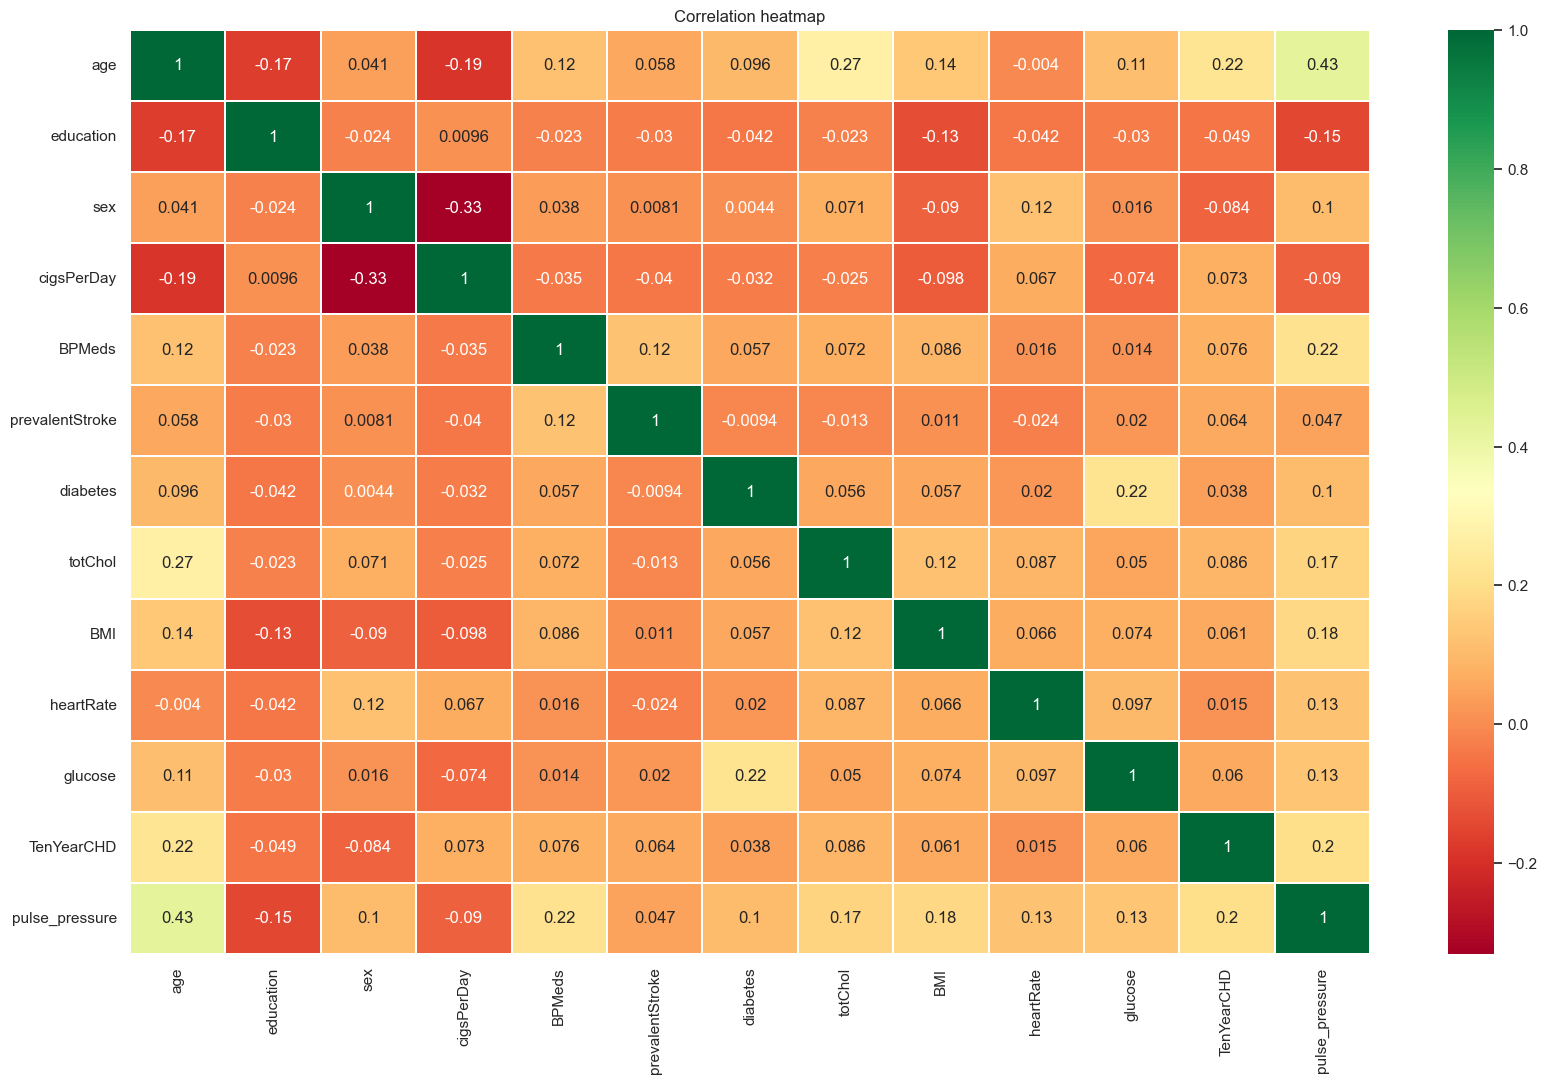

In [42]:
# Visualize the correlation heatmap of numerical features
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),  fmt=".2g",cmap='RdYlGn',linewidths=0.30,  annot = True)
plt.title('Correlation heatmap')
plt.show()

Feature scaling

In [43]:
df_scaled = df.copy()
df_notscaled = df.copy()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
X = df_scaled.drop('TenYearCHD', axis = 1)
y = df_scaled['TenYearCHD']

# Scaling the input features
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, stratify = y)

In [47]:
df_scaled['TenYearCHD'].value_counts()

0    2859
1     489
Name: TenYearCHD, dtype: int64

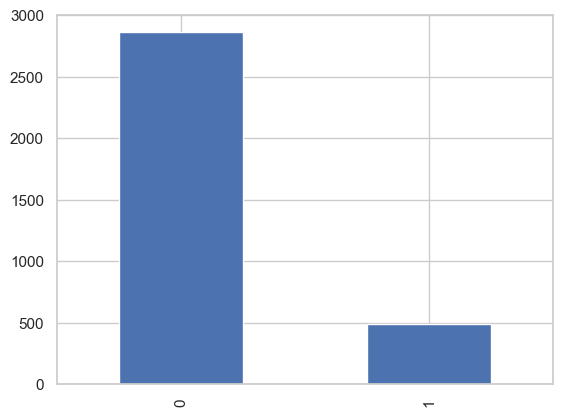

In [48]:
df_scaled['TenYearCHD'].value_counts().plot.bar()
plt.show()

In [49]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
X_train, y_train = smk.fit_resample(X_train, y_train)

In [50]:
print(f'The shape and X is {X_train.shape} and Y is {y_train.shape}')

The shape and X is (4542, 12) and Y is (4542,)


In [51]:
print(f'The shape and X is {X_test.shape} and Y is {y_test.shape}')

The shape and X is (670, 12) and Y is (670,)


In [52]:
# Fitting the data into models

In [53]:
# Initialize lists to store results
ML_Model = []
accuracy = []
f1_score_list = []
recall_list = []
precision_list = []

# Function to call for storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score_list.append(round(b, 3))
    recall_list.append(round(c, 3))
    precision_list.append(round(d, 3))

LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Predictions on training set
train_predictions = logistic_regression_model.predict(X_train)

# Predictions on testing set
test_predictions = logistic_regression_model.predict(X_test)

In [56]:
# Evaluate training performance
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)

# Evaluate testing performance
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)

In [57]:
# Print the evaluation metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(f"Recall: {train_recall}")
print(f"Precision: {train_precision}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"Recall: {test_recall}")
print(f"Precision: {test_precision}")

Training Metrics:
Accuracy: 0.6715103478643769
F1 Score: 0.6717993840739112
Recall: 0.6723910171730515
Precision: 0.6712087912087912

Testing Metrics:
Accuracy: 0.6268656716417911
F1 Score: 0.34554973821989526
Recall: 0.673469387755102
Precision: 0.2323943661971831


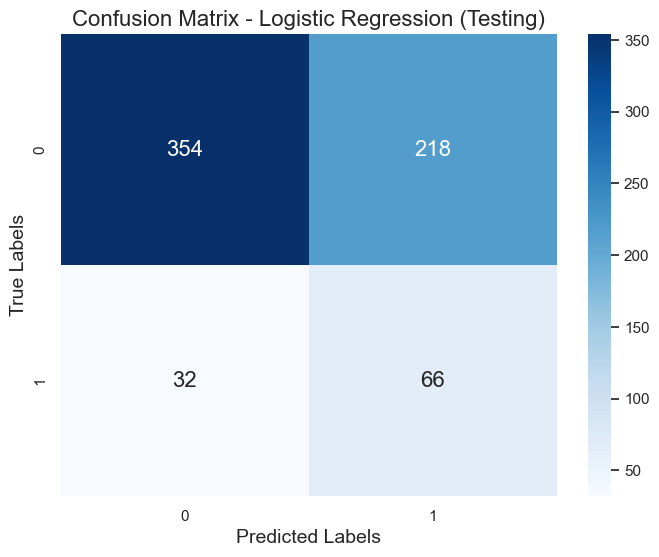

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for testing set
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - Logistic Regression (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

SVM

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [60]:
# Initialize Support Vector Machine classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions on training set
svm_train_predictions = svm_model.predict(X_train_scaled)

# Predictions on testing set
svm_test_predictions = svm_model.predict(X_test_scaled)

In [61]:
# Evaluate training performance
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
svm_train_f1 = f1_score(y_train, svm_train_predictions)
svm_train_recall = recall_score(y_train, svm_train_predictions)
svm_train_precision = precision_score(y_train, svm_train_predictions)

# Evaluate testing performance
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
svm_test_f1 = f1_score(y_test, svm_test_predictions)
svm_test_recall = recall_score(y_test, svm_test_predictions)
svm_test_precision = precision_score(y_test, svm_test_predictions)

In [62]:
# Print the evaluation metrics for SVM
print("SVM Training Metrics:")
print(f"Accuracy: {svm_train_accuracy}")
print(f"F1 Score: {svm_train_f1}")
print(f"Recall: {svm_train_recall}")
print(f"Precision: {svm_train_precision}")

print("\nSVM Testing Metrics:")
print(f"Accuracy: {svm_test_accuracy}")
print(f"F1 Score: {svm_test_f1}")
print(f"Recall: {svm_test_recall}")
print(f"Precision: {svm_test_precision}")

SVM Training Metrics:
Accuracy: 0.7661822985468957
F1 Score: 0.7702293379489399
Recall: 0.7837956847203875
Precision: 0.7571246278179498

SVM Testing Metrics:
Accuracy: 0.673134328358209
F1 Score: 0.31347962382445144
Recall: 0.5102040816326531
Precision: 0.22624434389140272


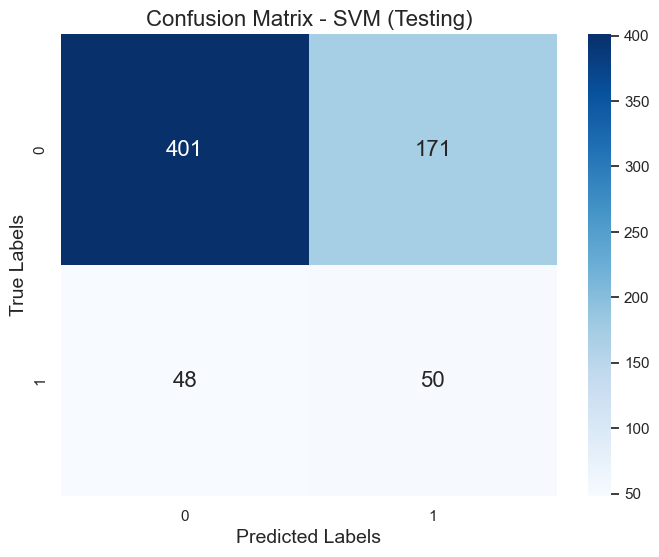

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for testing set
svm_conf_matrix = confusion_matrix(y_test, svm_test_predictions)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - SVM (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

XG BOOST

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
# Predictions on training set
xgb_train_predictions = xgb_model.predict(X_train_scaled)

# Predictions on testing set
xgb_test_predictions = xgb_model.predict(X_test_scaled)

In [66]:
# Evaluate training performance
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_f1 = f1_score(y_train, xgb_train_predictions)
xgb_train_recall = recall_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions)

# Evaluate testing performance
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_f1 = f1_score(y_test, xgb_test_predictions)
xgb_test_recall = recall_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions)

In [67]:
# Print the evaluation metrics for XGBoost
print("XGBoost Training Metrics:")
print(f"Accuracy: {xgb_train_accuracy}")
print(f"F1 Score: {xgb_train_f1}")
print(f"Recall: {xgb_train_recall}")
print(f"Precision: {xgb_train_precision}")

print("\nXGBoost Testing Metrics:")
print(f"Accuracy: {xgb_test_accuracy}")
print(f"F1 Score: {xgb_test_f1}")
print(f"Recall: {xgb_test_recall}")
print(f"Precision: {xgb_test_precision}")

XGBoost Training Metrics:
Accuracy: 0.9955966534566271
F1 Score: 0.9955771782397169
Recall: 0.991193306913254
Precision: 1.0

XGBoost Testing Metrics:
Accuracy: 0.8014925373134328
F1 Score: 0.2035928143712575
Recall: 0.17346938775510204
Precision: 0.2463768115942029


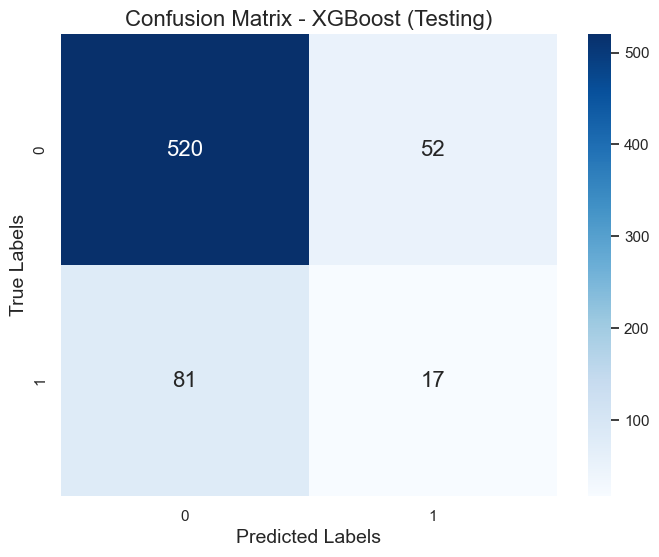

In [68]:
# Compute confusion matrix for testing set
xgb_conf_matrix = confusion_matrix(y_test, xgb_test_predictions)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - XGBoost (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

KNN 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Train the KNN model
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [70]:
# Predictions on training set
knn_train_predictions = knn_model.predict(X_train_scaled)

# Predictions on testing set
knn_test_predictions = knn_model.predict(X_test_scaled)

In [71]:
# Evaluate training performance
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
knn_train_f1 = f1_score(y_train, knn_train_predictions)
knn_train_recall = recall_score(y_train, knn_train_predictions)
knn_train_precision = precision_score(y_train, knn_train_predictions)

# Evaluate testing performance
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)
knn_test_f1 = f1_score(y_test, knn_test_predictions)
knn_test_recall = recall_score(y_test, knn_test_predictions)
knn_test_precision = precision_score(y_test, knn_test_predictions)

In [72]:
# Print the evaluation metrics for KNN
print("KNN Training Metrics:")
print(f"Accuracy: {knn_train_accuracy}")
print(f"F1 Score: {knn_train_f1}")
print(f"Recall: {knn_train_recall}")
print(f"Precision: {knn_train_precision}")

print("\nKNN Testing Metrics:")
print(f"Accuracy: {knn_test_accuracy}")
print(f"F1 Score: {knn_test_f1}")
print(f"Recall: {knn_test_recall}")
print(f"Precision: {knn_test_precision}")

KNN Training Metrics:
Accuracy: 0.8839718185821224
F1 Score: 0.8954157570946617
Recall: 0.9933949801849405
Precision: 0.815028901734104

KNN Testing Metrics:
Accuracy: 0.6447761194029851
F1 Score: 0.2958579881656805
Recall: 0.5102040816326531
Precision: 0.20833333333333334


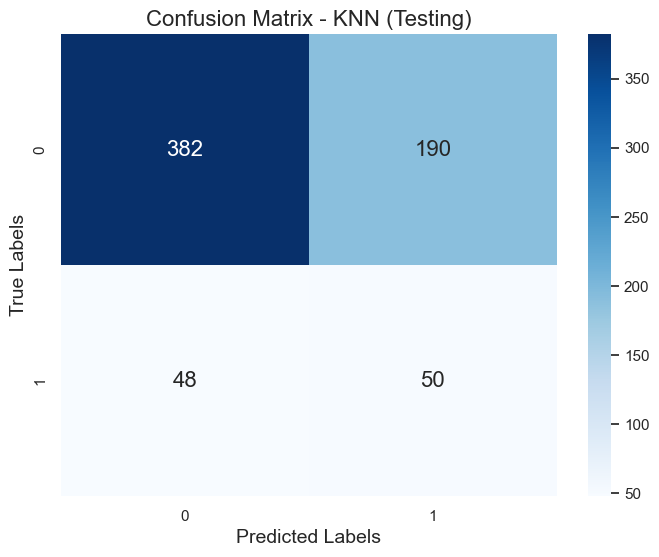

In [73]:
# Compute confusion matrix for testing set
knn_conf_matrix = confusion_matrix(y_test, knn_test_predictions)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - KNN (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [75]:
# Predictions on training set
rf_train_predictions = rf_model.predict(X_train_scaled)

# Predictions on testing set
rf_test_predictions = rf_model.predict(X_test_scaled)

In [76]:
# Evaluate training performance
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_f1 = f1_score(y_train, rf_train_predictions)
rf_train_recall = recall_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions)

# Evaluate testing performance
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions)

In [77]:
# Print the evaluation metrics for Random Forest
print("Random Forest Training Metrics:")
print(f"Accuracy: {rf_train_accuracy}")
print(f"F1 Score: {rf_train_f1}")
print(f"Recall: {rf_train_recall}")
print(f"Precision: {rf_train_precision}")

print("\nRandom Forest Testing Metrics:")
print(f"Accuracy: {rf_test_accuracy}")
print(f"F1 Score: {rf_test_f1}")
print(f"Recall: {rf_test_recall}")
print(f"Precision: {rf_test_precision}")

Random Forest Training Metrics:
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0

Random Forest Testing Metrics:
Accuracy: 0.808955223880597
F1 Score: 0.2727272727272727
Recall: 0.24489795918367346
Precision: 0.3076923076923077


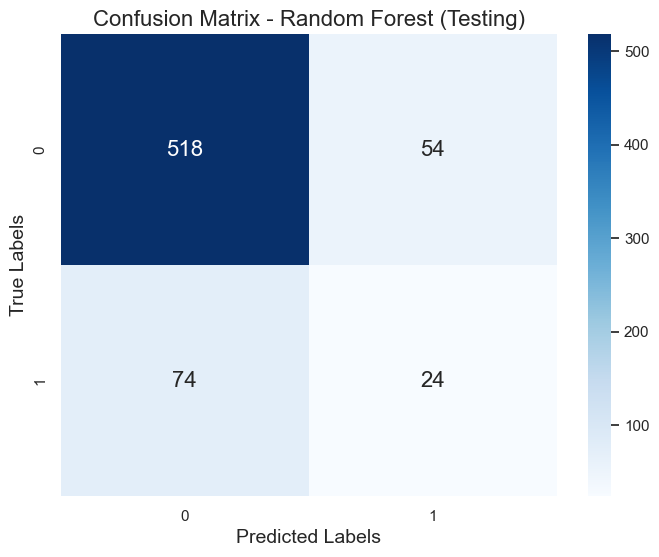

In [78]:
# Compute confusion matrix for testing set
rf_conf_matrix = confusion_matrix(y_test, rf_test_predictions)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - Random Forest (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

DECISION TREE

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [80]:
# Predictions on training set
dt_train_predictions = dt_model.predict(X_train_scaled)

# Predictions on testing set
dt_test_predictions = dt_model.predict(X_test_scaled)

In [81]:
# Evaluate training performance
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_train_f1 = f1_score(y_train, dt_train_predictions)
dt_train_recall = recall_score(y_train, dt_train_predictions)
dt_train_precision = precision_score(y_train, dt_train_predictions)

# Evaluate testing performance
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)
dt_test_f1 = f1_score(y_test, dt_test_predictions)
dt_test_recall = recall_score(y_test, dt_test_predictions)
dt_test_precision = precision_score(y_test, dt_test_predictions)

In [82]:
# Print the evaluation metrics for Decision Tree
print("Decision Tree Training Metrics:")
print(f"Accuracy: {dt_train_accuracy}")
print(f"F1 Score: {dt_train_f1}")
print(f"Recall: {dt_train_recall}")
print(f"Precision: {dt_train_precision}")

print("\nDecision Tree Testing Metrics:")
print(f"Accuracy: {dt_test_accuracy}")
print(f"F1 Score: {dt_test_f1}")
print(f"Recall: {dt_test_recall}")
print(f"Precision: {dt_test_precision}")

Decision Tree Training Metrics:
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0

Decision Tree Testing Metrics:
Accuracy: 0.6955223880597015
F1 Score: 0.22727272727272724
Recall: 0.30612244897959184
Precision: 0.18072289156626506


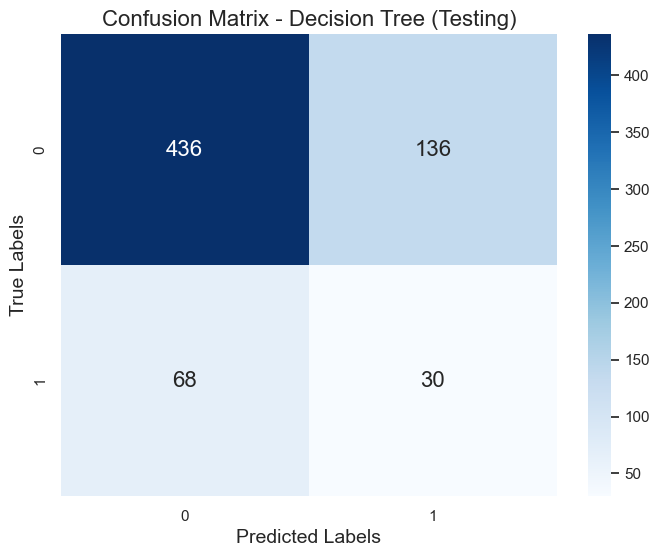

In [83]:
# Compute confusion matrix for testing set
dt_conf_matrix = confusion_matrix(y_test, dt_test_predictions)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - Decision Tree (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

NAIVE BAYES

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [85]:
# Predictions on training set
nb_train_predictions = nb_model.predict(X_train_scaled)

# Predictions on testing set
nb_test_predictions = nb_model.predict(X_test_scaled)

In [86]:
# Evaluate training performance
nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
nb_train_f1 = f1_score(y_train, nb_train_predictions)
nb_train_recall = recall_score(y_train, nb_train_predictions)
nb_train_precision = precision_score(y_train, nb_train_predictions)

# Evaluate testing performance
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
nb_test_f1 = f1_score(y_test, nb_test_predictions)
nb_test_recall = recall_score(y_test, nb_test_predictions)
nb_test_precision = precision_score(y_test, nb_test_predictions)

In [87]:
# Print the evaluation metrics for Naive Bayes
print("Naive Bayes Training Metrics:")
print(f"Accuracy: {nb_train_accuracy}")
print(f"F1 Score: {nb_train_f1}")
print(f"Recall: {nb_train_recall}")
print(f"Precision: {nb_train_precision}")

print("\nNaive Bayes Testing Metrics:")
print(f"Accuracy: {nb_test_accuracy}")
print(f"F1 Score: {nb_test_f1}")
print(f"Recall: {nb_test_recall}")
print(f"Precision: {nb_test_precision}")

Naive Bayes Training Metrics:
Accuracy: 0.5808014090708938
F1 Score: 0.3769633507853403
Recall: 0.2536327608982827
Precision: 0.7337579617834394

Naive Bayes Testing Metrics:
Accuracy: 0.7925373134328358
F1 Score: 0.2404371584699454
Recall: 0.22448979591836735
Precision: 0.25882352941176473


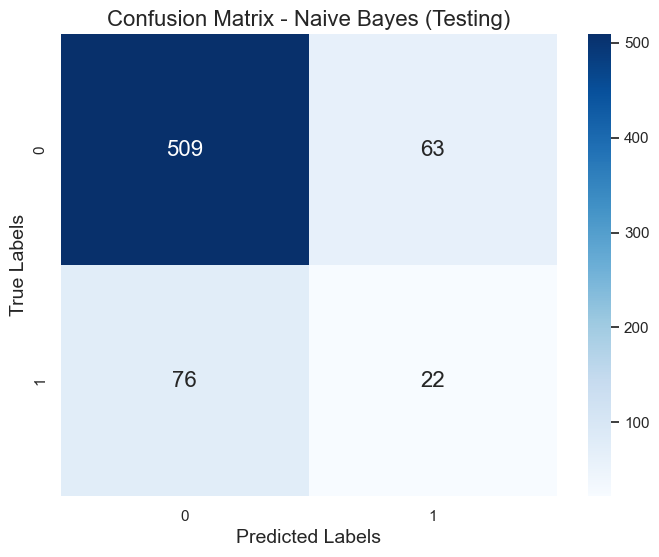

In [88]:
# Compute confusion matrix for testing set
nb_conf_matrix = confusion_matrix(y_test, nb_test_predictions)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 16})
plt.title('Confusion Matrix - Naive Bayes (Testing)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()







7/7 [==============================] - 0s 3ms/step
Hybrid CNN-LSTM Model Metrics:
Accuracy: 0.82
Precision: 0.9382716049382716
Recall: 0.7102803738317757
F1 Score: 0.8085106382978724
Confusion Matrix:
[[88  5]
 [31 76]]


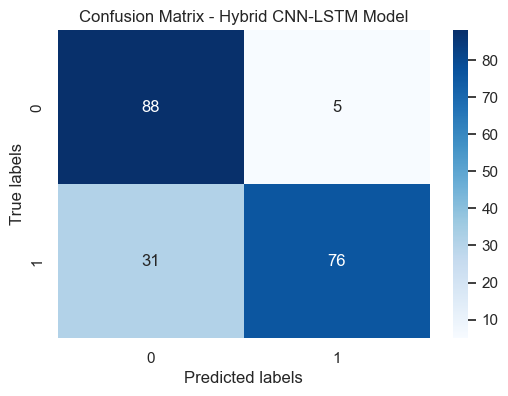

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the hybrid CNN-LSTM model with dropout
def create_hybrid_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and compile the model
hybrid_model = create_hybrid_model(X_train_cnn.shape[1:])

# Train the model
history = hybrid_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=0)

# Evaluate the model
y_pred_hybrid = (hybrid_model.predict(X_test_cnn) > 0.5).astype("int32")
acc_hybrid = accuracy_score(y_test, y_pred_hybrid)
precision_hybrid = precision_score(y_test, y_pred_hybrid)
recall_hybrid = recall_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid)
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)

# Print evaluation metrics
print("Hybrid CNN-LSTM Model Metrics:")
print("Accuracy:", acc_hybrid)
print("Precision:", precision_hybrid)
print("Recall:", recall_hybrid)
print("F1 Score:", f1_hybrid)
print("Confusion Matrix:")
print(cm_hybrid)

# Plotting confusion matrix for hybrid model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hybrid, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Hybrid CNN-LSTM Model')
plt.show()


HYBRID CNN-LSTM

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [91]:
# Generate sample data
X, y = make_classification(n_samples=10000, n_features=30, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [92]:
# Define the advanced hybrid CNN-LSTM model
def create_advanced_hybrid_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [93]:
# Create and compile the model
advanced_hybrid_model = create_advanced_hybrid_model(X_train_cnn.shape[1:])

# Define callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = advanced_hybrid_model.fit(X_train_cnn, y_train, epochs=50, batch_size=64, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/50
125/125 [==============================] - 7s 24ms/step - loss: 0.3999 - accuracy: 0.8286 - val_loss: 0.6809 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 2/50
125/125 [==============================] - 3s 21ms/step - loss: 0.3071 - accuracy: 0.8813 - val_loss: 0.6111 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 3/50
125/125 [==============================] - 3s 23ms/step - loss: 0.2838 - accuracy: 0.8928 - val_loss: 0.3409 - val_accuracy: 0.8835 - lr: 0.0010
Epoch 4/50
125/125 [==============================] - 3s 26ms/step - loss: 0.2592 - accuracy: 0.9068 - val_loss: 0.3008 - val_accuracy: 0.8740 - lr: 0.0010
Epoch 5/50
125/125 [==============================] - 3s 20ms/step - loss: 0.2395 - accuracy: 0.9135 - val_loss: 0.3118 - val_accuracy: 0.8870 - lr: 0.0010
Epoch 6/50
125/125 [==============================] - 3s 22ms/step - loss: 0.2213 - accuracy: 0.9200 - val_loss: 0.3071 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 7/50
125/125 [==============================] - 3s 25ms/st

In [94]:
# Evaluate the model
y_pred_advanced = (advanced_hybrid_model.predict(X_test_cnn) > 0.5).astype("int32")
acc_advanced = accuracy_score(y_test, y_pred_advanced)
precision_advanced = precision_score(y_test, y_pred_advanced)
recall_advanced = recall_score(y_test, y_pred_advanced)
f1_advanced = f1_score(y_test, y_pred_advanced)
cm_advanced = confusion_matrix(y_test, y_pred_advanced)

63/63 [==============================] - 1s 6ms/step


In [95]:
# Print evaluation metrics
print("AdvancHybrid CNN-LSTM Model Metrics:")
print("Accuracy:", acc_advanced)
print("Precision:", precision_advanced)
print("Recall:", recall_advanced)
print("F1 Score:", f1_advanced)
print("Confusion Matrix:")
print(cm_advanced)


AdvancHybrid CNN-LSTM Model Metrics:
Accuracy: 0.874
Precision: 0.8938906752411575
Recall: 0.8449848024316109
F1 Score: 0.86875
Confusion Matrix:
[[914  99]
 [153 834]]


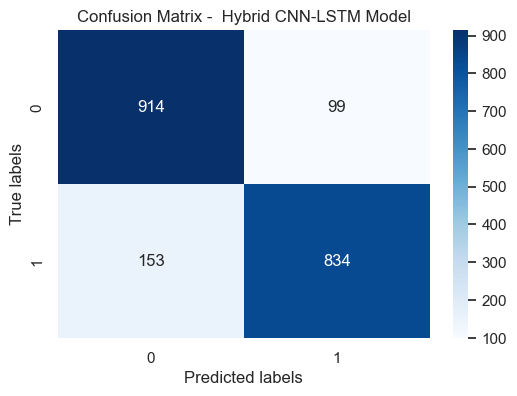

In [96]:
# Plotting confusion matrix for advanced model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_advanced, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix -  Hybrid CNN-LSTM Model')
plt.show()

In [97]:
import pandas as pd

# Define evaluation metrics for each algorithm
evaluation_metrics = {
    "Logistic Regression": {"Accuracy": test_accuracy, "Precision": test_precision, "Recall": test_recall, "F1-Score": test_f1},
    "SVM": {"Accuracy": svm_test_accuracy, "Precision": svm_test_precision, "Recall": svm_test_recall, "F1-Score": svm_test_f1},
    "XGBoost": {"Accuracy": xgb_test_accuracy, "Precision": xgb_test_precision, "Recall": xgb_test_recall, "F1-Score": xgb_test_f1},
    "KNN": {"Accuracy": knn_test_accuracy, "Precision": knn_test_precision, "Recall": knn_test_recall, "F1-Score": knn_test_f1},
    "Random Forest": {"Accuracy": rf_test_accuracy, "Precision": rf_test_precision, "Recall": rf_test_recall, "F1-Score": rf_test_f1},
    "Decision Tree": {"Accuracy": dt_test_accuracy, "Precision": dt_test_precision, "Recall": dt_test_recall, "F1-Score": dt_test_f1},
    "Naive Bayes": {"Accuracy": nb_test_accuracy, "Precision": nb_test_precision, "Recall": nb_test_recall, "F1-Score": nb_test_f1},
    "Hybrid CNN-LSTM": {"Accuracy": acc_advanced, "Precision": precision_advanced, "Recall": recall_advanced, "F1-Score": f1_advanced}
}

# Create DataFrame from evaluation metrics
df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

# Print the DataFrame
print("Evaluation Metrics for Different Algorithms:")
print(df)

Evaluation Metrics for Different Algorithms:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression   0.62687    0.23239 0.67347   0.34555
SVM                   0.67313    0.22624 0.51020   0.31348
XGBoost               0.80149    0.24638 0.17347   0.20359
KNN                   0.64478    0.20833 0.51020   0.29586
Random Forest         0.80896    0.30769 0.24490   0.27273
Decision Tree         0.69552    0.18072 0.30612   0.22727
Naive Bayes           0.79254    0.25882 0.22449   0.24044
Hybrid CNN-LSTM       0.87400    0.89389 0.84498   0.86875


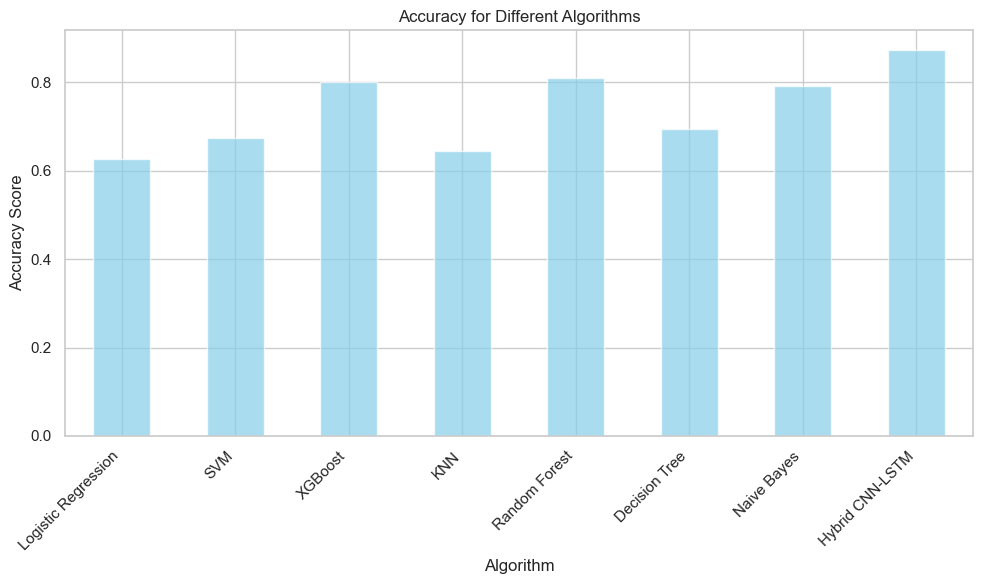

In [98]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot Accuracy
df['Accuracy'].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Accuracy for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()
